# Hauptkomponentenanlyse (PCA)

## Imports

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Datengrundlage

In [2]:
data = load_wine()
x = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x,y)

## Hauptkomponentananalyse trainieren

In [3]:
pca = PCA(n_components=2)
embedding = pca.fit_transform(x)

## Embedding visualisieren

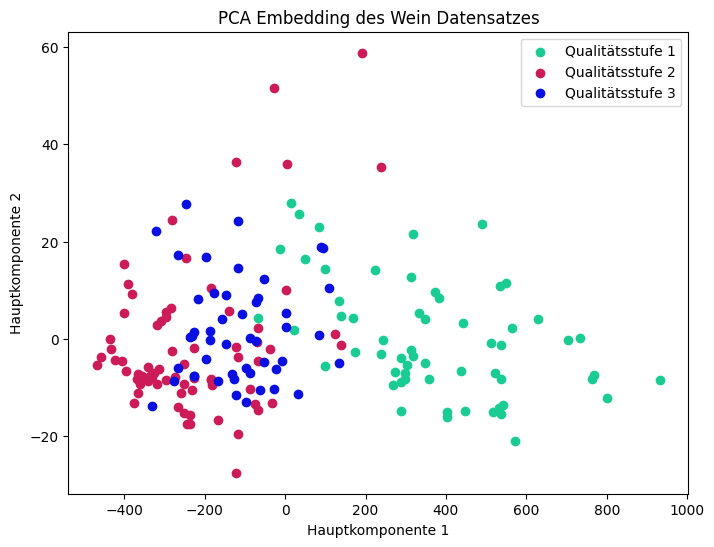

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(embedding[np.where(y==0),:1],embedding[np.where(y==0),1:],label="Qualitätsstufe 1",c="#1ACC94")
plt.scatter(embedding[np.where(y==1),:1],embedding[np.where(y==1),1:],label="Qualitätsstufe 2",c="#CC1B58")
plt.scatter(embedding[np.where(y==2),:1],embedding[np.where(y==2),1:],label="Qualitätsstufe 3",c="#090EE1")
plt.legend()
plt.title("PCA Embedding des Wein Datensatzes")
plt.xlabel("Hauptkomponente 1")
plt.ylabel("Hauptkomponente 2")
plt.show()

## Wirkung auf die Akkuranz

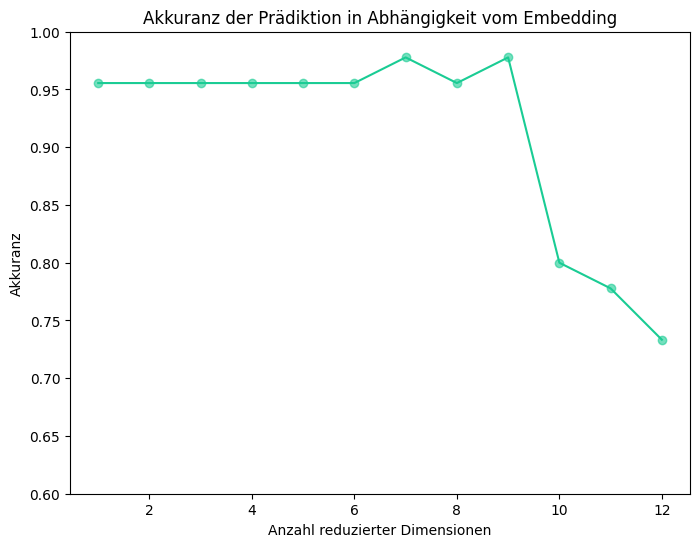

In [5]:
scores = []
for i in np.flip(range(1,x.shape[1])):
    pca = PCA(n_components=i)
    embedding_train = pca.fit_transform(x_train)
    embedding_test = pca.transform(x_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(embedding_train,y_train)
    scores.append(model.score(embedding_test, y_test))

plt.figure(figsize=(8,6))
plt.title("Akkuranz der Prädiktion in Abhängigkeit vom Embedding")
plt.plot(range(1,x.shape[1]),scores,c="#1ACC94")
plt.scatter(range(1,x.shape[1]),scores,c="#1ACC94",alpha=0.6)
plt.xlabel("Anzahl reduzierter Dimensionen")
plt.ylabel("Akkuranz")
plt.ylim([0.6,1])
plt.show()